In [1]:
# DESATIVAR MENSAGENS DE WARNINGS (warn = -1) E ATIVAR (warn = 0)
options(warn = -1)

In [2]:
# DESATIVA NOTAÇÃO CIENTÍFICA
options(scipen = 999)

In [3]:
# PARA TAMANHO DOS GRÁFICOS
options(jupyter.plot_scale = 1)

In [4]:
# CARREGANDO BIBLIOTECAS 
suppressPackageStartupMessages({
library(dplyr)
library(data.table)
library(tibble)
library(readr)
library(lubridate)
library(tidyr)
library(stringr)
library(ggplot2)
library(cowplot)
library(gridExtra)
library(corrplot)
library(caret)
library(caTools)
library(Rcmdr)
library(randomForest)
})

In [5]:
# CARREGAR DATASET DE VENDAS
df_vendas <- fread('vendas.csv', encoding = "UTF-8")
glimpse(df_vendas)

Rows: 32,753
Columns: 8
$ ID        <chr> "80260d682079b6090c8285b398c50d97", "3275736da1234f55d52bdf0~
$ ProductID <chr> "002552c0663708129c0019cc97552d7d3", "001b237c0e9bb435f2e540~
$ ClientID  <int> 14001, 14001, 14001, 14002, 14002, 14002, 14002, 14002, 1400~
$ Discount  <chr> "0,08", "0,1", "0,1", "0,1", "0,1", "0,1", "0,08", "0,08", "~
$ UnitPrice <chr> "249,2", "162,4", "194,6", "201,6", "406", "249,2", "261,8",~
$ Quantity  <int> 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ StoreID   <int> 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 7, 7, ~
$ Date      <chr> "10/12/2018", "25/04/2019", "17/07/2019", "10/04/2018", "21/~


In [6]:
# TRANSFORMAR PARA DATAFRAME
df_vendas <- as.data.frame(df_vendas)

In [7]:
# CARREGAR DATASET PRODUTO
df_produto <- fread('id-produto.csv', encoding = "UTF-8")
glimpse(df_produto)

Rows: 999
Columns: 3
$ ID   <chr> "00066f42aeeb9f3007548bb9d3f33c381", "00066f42aeeb9f3007548bb9d3f~
$ Name <chr> "Capitão América", "Capitão América", "Capitão América", "Thor", ~
$ Size <chr> "P", "M", "G", "P", "M", "G", "P", "M", "G", "P", "M", "G", "P", ~


In [8]:
# TRANSFORMAR PARA DATAFRAME
df_produto <- as.data.frame(df_produto)

In [9]:
# RENOMEAR COLUNA ID PARA PRODUCTID
df_produto <- rename(df_produto, ProductID = ID)
glimpse(df_produto)

Rows: 999
Columns: 3
$ ProductID <chr> "00066f42aeeb9f3007548bb9d3f33c381", "00066f42aeeb9f3007548b~
$ Name      <chr> "Capitão América", "Capitão América", "Capitão América", "Th~
$ Size      <chr> "P", "M", "G", "P", "M", "G", "P", "M", "G", "P", "M", "G", ~


In [10]:
# CARREGAR DATASET CLIENTE
df_cliente <- fread('id-cliente.csv', encoding = "UTF-8")
glimpse(df_cliente)

Rows: 13,650
Columns: 5
$ ID          <int> 14001, 14002, 14003, 14004, 14005, 14006, 14007, 14008, 14~
$ City        <chr> "Curitiba", "Florianópolis", "Rio de Janeiro", "Rio de Jan~
$ State       <chr> "PR", "SC", "RJ", "RJ", "SC", "RJ", "SP", "SP", "RJ", "RJ"~
$ DateOfBirth <chr> "28/06/1985", "10/01/1987", "05/11/1979", "25/11/1983", "0~
$ Sex         <chr> "Homem", "Homem", "Homem", "Mulher", "Homem", "Mulher", "H~


In [11]:
# TRANSFORMAR PARA DATAFRAME
df_cliente <- as.data.frame(df_cliente)

In [12]:
# RENOMEAR COLUNA ID PARA CLIENTID
df_cliente <- rename(df_cliente, ClientID = ID)

In [13]:
# CARREGAR DATASET LOJA
df_loja <- fread('id-loja.csv', encoding = "UTF-8")
glimpse(df_loja)

Rows: 7
Columns: 3
$ ID    <int> 1, 2, 3, 4, 7, 9, 22
$ Name  <chr> "Florianópolis", "Rio de Janeiro", "Porto Alegre", "Curitiba", "~
$ State <chr> "SC", "RJ", "RS", "PR", "SP", "MG", "na"


In [14]:
# TRANSFORMAR PARA DATAFRAME
df_loja <- as.data.frame(df_loja)

In [15]:
# RENOMEAR COLUNA ID PARA STOREID
df_loja <- rename(df_loja, StoreID = ID)

In [16]:
# UNIR DATASETS
df_tabela <- df_vendas %>%
    inner_join(df_produto, by = 'ProductID') %>%
    inner_join(df_cliente, by = 'ClientID')  %>%
    inner_join(df_loja, by = 'StoreID')

glimpse(df_tabela)

Rows: 32,753
Columns: 16
$ ID          <chr> "80260d682079b6090c8285b398c50d97", "3275736da1234f55d52bd~
$ ProductID   <chr> "002552c0663708129c0019cc97552d7d3", "001b237c0e9bb435f2e5~
$ ClientID    <int> 14001, 14001, 14001, 14002, 14002, 14002, 14002, 14002, 14~
$ Discount    <chr> "0,08", "0,1", "0,1", "0,1", "0,1", "0,1", "0,08", "0,08",~
$ UnitPrice   <chr> "249,2", "162,4", "194,6", "201,6", "406", "249,2", "261,8~
$ Quantity    <int> 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ StoreID     <int> 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 7, 7~
$ Date        <chr> "10/12/2018", "25/04/2019", "17/07/2019", "10/04/2018", "2~
$ Name.x      <chr> "Tempestade", "Thanos", "Capitão América", "Wolverine", "N~
$ Size        <chr> "G", "G", "P", "G", "G", "G", "G", "G", "G", "G", "G", "G"~
$ City        <chr> "Curitiba", "Curitiba", "Curitiba", "Florianópolis", "Flor~
$ State.x     <chr> "PR", "PR", "PR", "SC", "SC", "SC", "SC", "SC", "RJ", "RJ"~
$ DateOfBirth <

In [17]:
# SELECIONAR VARIÁVEIS PARA SEREM TRABALHADAS
df_tabela <- df_tabela %>%
       select(ID,Date,ProductID,Name.x,Size,ClientID,Sex,DateOfBirth,Discount,UnitPrice,Quantity,StoreID,City,State.x)

head(df_tabela)

ID,Date,ProductID,Name.x,Size,ClientID,Sex,DateOfBirth,Discount,UnitPrice,Quantity,StoreID,City,State.x
80260d682079b6090c8285b398c50d97,10/12/2018,002552c0663708129c0019cc97552d7d3,Tempestade,G,14001,Homem,28/06/1985,"0,08","249,2",1,4,Curitiba,PR
3275736da1234f55d52bdf09d86b93bc,25/04/2019,001b237c0e9bb435f2e54071129237e93,Thanos,G,14001,Homem,28/06/1985,"0,1","162,4",1,4,Curitiba,PR
f3513eec8f1434b5b7e04ddf3598df40,17/07/2019,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P,14001,Homem,28/06/1985,"0,1","194,6",1,4,Curitiba,PR
7180475b60fe6bbbde424d39704a1177,10/04/2018,001b72dfd63e9833e8c02742adf472e33,Wolverine,G,14002,Homem,10/01/1987,"0,1","201,6",2,1,Florianópolis,SC
76600853a200fe87e141adae6b35674c,21/01/2019,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,14002,Homem,10/01/1987,"0,1",406,1,1,Florianópolis,SC
7ab64f42a8f9ab290e920eed320d7e60,28/03/2019,002552c0663708129c0019cc97552d7d3,Tempestade,G,14002,Homem,10/01/1987,"0,1","249,2",1,1,Florianópolis,SC


In [18]:
# SUBSTITUIR VÍRGULA POR PONTO
df_tabela$UnitPrice <- as.numeric(sub(",", ".", df_tabela$UnitPrice, fixed = TRUE))
df_tabela$Discount <- as.numeric(sub(",", ".", df_tabela$Discount, fixed = TRUE))

In [19]:
# ALTERAR FORMATO DA COLUNA DATE PARA DATA
df_tabela$Date = as.Date(df_tabela$Date, format = "%d/%m/%Y")
df_tabela$DateOfBirth = as.Date(df_tabela$DateOfBirth, format = "%d/%m/%Y")
glimpse(df_tabela)

Rows: 32,753
Columns: 14
$ ID          <chr> "80260d682079b6090c8285b398c50d97", "3275736da1234f55d52bd~
$ Date        <date> 2018-12-10, 2019-04-25, 2019-07-17, 2018-04-10, 2019-01-2~
$ ProductID   <chr> "002552c0663708129c0019cc97552d7d3", "001b237c0e9bb435f2e5~
$ Name.x      <chr> "Tempestade", "Thanos", "Capitão América", "Wolverine", "N~
$ Size        <chr> "G", "G", "P", "G", "G", "G", "G", "G", "G", "G", "G", "G"~
$ ClientID    <int> 14001, 14001, 14001, 14002, 14002, 14002, 14002, 14002, 14~
$ Sex         <chr> "Homem", "Homem", "Homem", "Homem", "Homem", "Homem", "Hom~
$ DateOfBirth <date> 1985-06-28, 1985-06-28, 1985-06-28, 1987-01-10, 1987-01-1~
$ Discount    <dbl> 0.08, 0.10, 0.10, 0.10, 0.10, 0.10, 0.08, 0.08, 0.10, 0.10~
$ UnitPrice   <dbl> 249.2, 162.4, 194.6, 201.6, 406.0, 249.2, 261.8, 114.8, 14~
$ Quantity    <int> 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ StoreID     <int> 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 7, 7~
$ City        <

#### PROBLEMAS

#### QUANTOS PRODUTOS ÚNICOS FORAM VENDIDOS?

In [20]:
r1 <- df_tabela %>%
    group_by(ProductID) %>%
    summarise()

In [21]:
nrow(r1)

[1] 73

#### QUAL O PRODUTO MAIS VENDIDO E QUANTOS DESSE PRODUTO FORAM VENDIDOS?

In [22]:
r2 <- df_tabela %>%
    group_by(Name.x,Size) %>%
    summarise(total = sum(Quantity))

`summarise()` has grouped output by 'Name.x'. You can override using the `.groups` argument.


In [23]:
r2 <- r2[order(r2$total, decreasing = T),]
head(r2, 5)

Name.x,Size,total
Bazinga,G,1020
Iron Man,G,1018
Deadpool,G,998
Capitã Marvel,G,996
Flash,G,996


#### CONSIDERANDO O ANO DE 2019, REPRESENTAR GRAFICAMENTE A QUANTIDADE MENSAL VENDIDA DO PRODUTO "IRON MAN G"?

In [73]:
# SELECIONAR POR ITEM IRON MAN G
ironmanG <- df_tabela[df_tabela$Name.x == "Iron Man" & df_tabela$Size == "G",]
head(ironmanG, 10)

,ID,Date,ProductID,Name.x,Size,ClientID,Sex,DateOfBirth,Discount,UnitPrice,Quantity,StoreID,City,State.x
43,85647e1ff3e4b10814f375af01c38836,2018-08-09,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14017,Homem,1971-06-22,0.08,210,1,1,Florianópolis,SC
107,ec451fb3a1ee5782fef4937473a9ffac,2018-09-28,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14042,Homem,1965-07-01,0.10,210,1,1,Florianópolis,SC
171,c68e47bd3dab5dd575a6c65848663923,2018-12-24,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,19674,Homem,1984-03-04,0.08,210,1,2,Rio de Janeiro,RJ
204,a97c9b194a026ac3e75726c485f6e8ea,2019-06-28,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14074,Mulher,1973-08-15,0.08,210,1,2,Rio de Janeiro,RJ
222,ea110ced6459b4dc6c73e0b2367077e9,2019-09-03,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14080,Homem,1990-11-25,0.10,210,1,1,Florianópolis,SC
235,801f0faf13878ee42788d7bd0e4c72fe,2018-11-30,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14084,Homem,1971-10-16,0.10,210,1,4,Curitiba,PR
239,89fb8b371b28dcc037a9c1f798eacc81,2019-05-06,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14088,Homem,1987-09-18,0.10,210,1,1,Florianópolis,SC
285,8bae398ae3bdca643616198d918aa8c6,2018-10-07,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14110,Homem,1999-06-22,0.10,210,1,2,Rio de Janeiro,RJ
324,51efa345a1180ca3879442a31b0a265a,2019-09-04,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14127,Homem,1969-09-03,0.10,210,1,22,Belo Horizonte,BH
365,cd44196e80474114b859765d62f12ddf,2018-08-23,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14145,Mulher,1960-11-06,0.08,210,1,2,Rio de Janeiro,RJ


In [74]:
# CRIAR COLUNA DE ANO PARA VERIFICAR AS VENDAS DO ITEM IRON MAN G EM 2019
ironmanG <- mutate(ironmanG, Ano =  year(ironmanG$Date))
ironmanG_2019 <- ironmanG[ironmanG$Ano == 2019,]
head(ironmanG_2019, 10)

,ID,Date,ProductID,Name.x,Size,ClientID,Sex,DateOfBirth,Discount,UnitPrice,Quantity,StoreID,City,State.x,Ano
204,a97c9b194a026ac3e75726c485f6e8ea,2019-06-28,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14074,Mulher,1973-08-15,0.08,210,1,2,Rio de Janeiro,RJ,2019
222,ea110ced6459b4dc6c73e0b2367077e9,2019-09-03,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14080,Homem,1990-11-25,0.10,210,1,1,Florianópolis,SC,2019
239,89fb8b371b28dcc037a9c1f798eacc81,2019-05-06,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14088,Homem,1987-09-18,0.10,210,1,1,Florianópolis,SC,2019
324,51efa345a1180ca3879442a31b0a265a,2019-09-04,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14127,Homem,1969-09-03,0.10,210,1,22,Belo Horizonte,BH,2019
488,f89525a2a79be7efb2afb5844cf2652d,2019-10-26,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14197,Homem,1954-11-16,0.10,210,1,1,Florianópolis,SC,2019
530,6ee1c0ae2850fce0967f050c82d6a532,2019-01-02,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14215,Homem,1956-08-19,0.10,210,1,1,Florianópolis,SC,2019
548,c09ea37d3dd207e756102d311bcdff13,2019-10-09,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14223,Homem,1989-09-08,0.10,210,1,2,Rio de Janeiro,RJ,2019
557,2c76644ebdca47aa2d980e3b2714af13,2019-01-04,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14228,Homem,1974-12-26,0.10,210,1,3,Porto Alegre,RS,2019
675,d2d740a1b76ee640f76fba030363144e,2019-05-24,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14290,Homem,1997-06-21,0.10,210,1,1,Florianópolis,SC,2019
687,a3b51577e617e3ffd00a8718b05874fd,2019-10-09,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14294,Mulher,1985-11-11,0.10,210,1,2,Rio de Janeiro,RJ,2019


In [75]:
# CRIAR COLUNA DE MÊS PARA VERIFICAR AS VENDAS MENSAIS DO ITEM IRON MAN G 
ironmanG_2019_mes <- mutate(ironmanG_2019, Mes =  month(ironmanG_2019$Date))
head(ironmanG_2019_mes, 10)

,ID,Date,ProductID,Name.x,Size,ClientID,Sex,DateOfBirth,Discount,UnitPrice,Quantity,StoreID,City,State.x,Ano,Mes
204,a97c9b194a026ac3e75726c485f6e8ea,2019-06-28,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14074,Mulher,1973-08-15,0.08,210,1,2,Rio de Janeiro,RJ,2019,6
222,ea110ced6459b4dc6c73e0b2367077e9,2019-09-03,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14080,Homem,1990-11-25,0.10,210,1,1,Florianópolis,SC,2019,9
239,89fb8b371b28dcc037a9c1f798eacc81,2019-05-06,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14088,Homem,1987-09-18,0.10,210,1,1,Florianópolis,SC,2019,5
324,51efa345a1180ca3879442a31b0a265a,2019-09-04,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14127,Homem,1969-09-03,0.10,210,1,22,Belo Horizonte,BH,2019,9
488,f89525a2a79be7efb2afb5844cf2652d,2019-10-26,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14197,Homem,1954-11-16,0.10,210,1,1,Florianópolis,SC,2019,10
530,6ee1c0ae2850fce0967f050c82d6a532,2019-01-02,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14215,Homem,1956-08-19,0.10,210,1,1,Florianópolis,SC,2019,1
548,c09ea37d3dd207e756102d311bcdff13,2019-10-09,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14223,Homem,1989-09-08,0.10,210,1,2,Rio de Janeiro,RJ,2019,10
557,2c76644ebdca47aa2d980e3b2714af13,2019-01-04,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14228,Homem,1974-12-26,0.10,210,1,3,Porto Alegre,RS,2019,1
675,d2d740a1b76ee640f76fba030363144e,2019-05-24,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14290,Homem,1997-06-21,0.10,210,1,1,Florianópolis,SC,2019,5
687,a3b51577e617e3ffd00a8718b05874fd,2019-10-09,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14294,Mulher,1985-11-11,0.10,210,1,2,Rio de Janeiro,RJ,2019,10


In [76]:
# VENDAS MENSAIS DO ITEM IRON MAN G 
r3 <- ironmanG_2019_mes %>%
    group_by(Mes) %>%
    summarise(total = sum(Quantity))

head(r3, 12)

Mes,total
1,30
2,22
3,27
4,31
5,35
6,56
7,38
8,65
9,25
10,30


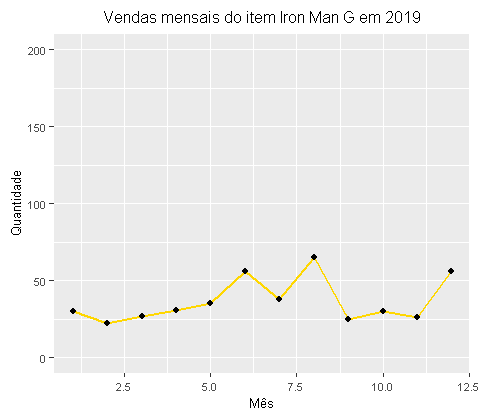

In [77]:
# REPRESENTAÇÃO GRÁFICA DAS VENDAS MENSAIS DO ITEM IRON MAN G EM 2019
g1 <- ggplot(r3, aes(x = Mes, y = total)) +
    geom_line(size = 0.7,colour = 'gold') +                    
    geom_point(size = 1.3, colour = 'black') +
    coord_cartesian(xlim = c(1,12),ylim = c(0, 200)) +
    labs(x = "Mês", y = "Quantidade", title = "Vendas mensais do item Iron Man G em 2019") +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 8))

options(repr.plot.width = 4, repr.plot.height = 3.5)
g1

#### CONSIDERANDO A RECEITA LÍQUIDA MENSAL DE VENDAS EM 2019. QUAIS OS VALORES DE: MÉDIA, MEDIANA E DESVIO PADRÃO DESSES VALORES?

In [78]:
# CRIAR COLUNAS DE ANO E MÊS PARA SELEÇÃO
df_receita <- mutate(df_tabela, Ano =  year(df_tabela$Date))
df_receita <- mutate(df_receita, Mes = month(df_receita$Date))

In [79]:
# SELECIONAR PELO ANO 2019
df_receita <- df_receita[df_receita$Ano == 2019,]
head(df_receita, 10)

,ID,Date,ProductID,Name.x,Size,ClientID,Sex,DateOfBirth,Discount,UnitPrice,Quantity,StoreID,City,State.x,Ano,Mes
2,3275736da1234f55d52bdf09d86b93bc,2019-04-25,001b237c0e9bb435f2e54071129237e93,Thanos,G,14001,Homem,1985-06-28,0.10,162.4,1,4,Curitiba,PR,2019,4
3,f3513eec8f1434b5b7e04ddf3598df40,2019-07-17,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P,14001,Homem,1985-06-28,0.10,194.6,1,4,Curitiba,PR,2019,7
5,76600853a200fe87e141adae6b35674c,2019-01-21,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,14002,Homem,1987-01-10,0.10,406.0,1,1,Florianópolis,SC,2019,1
6,7ab64f42a8f9ab290e920eed320d7e60,2019-03-28,002552c0663708129c0019cc97552d7d3,Tempestade,G,14002,Homem,1987-01-10,0.10,249.2,1,1,Florianópolis,SC,2019,3
7,b35a771164a9defa3b4767f1b66918b1,2019-08-14,002959d7a0b0990fe2d69988affcbc803,Ciclope,G,14002,Homem,1987-01-10,0.08,261.8,1,1,Florianópolis,SC,2019,8
8,28618be7d166aad45ab14e9bca43cc19,2019-12-30,00126f27c813603687e6ce486d909d013,Coringa,G,14002,Homem,1987-01-10,0.08,114.8,1,1,Florianópolis,SC,2019,12
13,7712472a07a10232dd2e57a0c2532cd3,2019-06-23,002af88741ba70c7b5cf4e4a0ad7ef853,Dragon Ball Z,G,14004,Mulher,1983-11-25,0.08,134.4,1,2,Rio de Janeiro,RJ,2019,6
14,d53709cd2507666542fcf8f6120b99f0,2019-08-01,002552c0663708129c0019cc97552d7d3,Tempestade,G,14004,Mulher,1983-11-25,0.08,249.2,1,2,Rio de Janeiro,RJ,2019,8
15,7501e0d79e115a1491674e6154b47bd4,2019-12-12,001b72dfd63e9833e8c02742adf472e33,Wolverine,G,14004,Mulher,1983-11-25,0.08,201.6,1,2,Rio de Janeiro,RJ,2019,12
18,0f740a04b4f5fce0611344905b62332c,2019-01-30,003128f981470c3e5a2e7445e4a771cd3,Homer Simpsons,G,14006,Mulher,1951-08-17,0.10,161.0,1,2,Rio de Janeiro,RJ,2019,1


In [80]:
# AGRUPAR POR MÊS E OBTER NÚMERO DE VENDAS E RESUMO ESTATÍSTICO
r4 <- df_receita %>% 
    group_by(Mes) %>% 
    summarize(Vendas_Mes = sum(UnitPrice))

head(r4)

Mes,Vendas_Mes
1,224638.4
2,178669.4
3,303454.2
4,277320.4
5,300983.2
6,471296.0


In [81]:
# MEDIANA E MÉDIA
summary(r4$Vendas_Mes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 178669  256883  273622  309649  341444  471296 

In [82]:
# DESVIO PADRÃO
round(sd(r4$Vendas_Mes))

[1] 99617

#### AINDA CONSIDERANDO OS DADOS DE RECEITA LÍQUIDA DE VENDAS EM 2019, DEVE-SE FOCAR ESFORÇOS EM UMA DAS LOJAS PARA CRIAR ANÁLISES MAIS PROFUNDAS E A PRIMEIRA VERSÃO DO MODELO PREDITIVO. QUAL DESTAS LOJAS ESCOLHER PARA PROSSEGUIR?

In [83]:
r5 <- df_receita %>% 
     group_by(City) %>% 
     summarize(Vendas_Lojas = sum(UnitPrice))

In [84]:
r5 <- r5[order(r5$Vendas_Lojas, decreasing = T),]
head(r5, 10)

City,Vendas_Lojas
Florianópolis,941383.8
Rio de Janeiro,752977.4
Porto Alegre,699440.0
Curitiba,586675.6
São Paulo,370277.6
Belo Horizonte,291764.2
Sao paulo,13092.8
Rio de janeiro,2279.2
Governador valadares,1979.6
Sao lourenco,1839.6


#### CRIAR UM PREVISÃO DE DEMANDA DO ITEM IRON MAN G PARA A LOJA DE FLORIANÓPOLIS NO MÊS DE JANEIRO, FEVEREIRO E MARÇO DE 2020

O dataset utilizado nesta análise já contém os dados de vendas do ano de 2020. Contudo, irei criar modelos para mostrar alguns métodos de aprendizado de máquina para previsão de demanda. Os dados utilizados serão os dados de 2018 e 2019. Os resultados serão comparados com os reais dos meses janeiro, fevereiro e março de 2020.

In [88]:
# CRIAR COLUNA DE ANO PARA VERIFICAR AS VENDAS DO ITEM IRON MAN G EM 2018 E 2019
ironmanG_sc <- ironmanG[ironmanG$Ano == 2018 | ironmanG$Ano == 2019,]
ironmanG_sc <- ironmanG_sc[ironmanG_sc$City == "Florianópolis",]
head(ironmanG_sc, 10)

,ID,Date,ProductID,Name.x,Size,ClientID,Sex,DateOfBirth,Discount,UnitPrice,Quantity,StoreID,City,State.x,Ano
43,85647e1ff3e4b10814f375af01c38836,2018-08-09,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14017,Homem,1971-06-22,0.08,210,1,1,Florianópolis,SC,2018
107,ec451fb3a1ee5782fef4937473a9ffac,2018-09-28,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14042,Homem,1965-07-01,0.10,210,1,1,Florianópolis,SC,2018
222,ea110ced6459b4dc6c73e0b2367077e9,2019-09-03,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14080,Homem,1990-11-25,0.10,210,1,1,Florianópolis,SC,2019
239,89fb8b371b28dcc037a9c1f798eacc81,2019-05-06,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14088,Homem,1987-09-18,0.10,210,1,1,Florianópolis,SC,2019
488,f89525a2a79be7efb2afb5844cf2652d,2019-10-26,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14197,Homem,1954-11-16,0.10,210,1,1,Florianópolis,SC,2019
530,6ee1c0ae2850fce0967f050c82d6a532,2019-01-02,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14215,Homem,1956-08-19,0.10,210,1,1,Florianópolis,SC,2019
591,e6c9b642d368d7b255dab2dd301c5f45,2018-08-24,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14245,Homem,1985-02-12,0.08,210,1,1,Florianópolis,SC,2018
655,7d01cf337c32eee6c03ebb4c19a7082f,2018-03-14,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14275,Homem,1952-05-18,0.10,210,1,1,Florianópolis,SC,2018
675,d2d740a1b76ee640f76fba030363144e,2019-05-24,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14290,Homem,1997-06-21,0.10,210,1,1,Florianópolis,SC,2019
682,cdd37a2cbee3ccf5fb245f4e19971f31,2018-08-14,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G,14293,Mulher,1984-09-21,0.08,210,1,1,Florianópolis,SC,2018
